# 算法原理

等距特征映射（Isomap）算法改造自多维缩放（MDS）算法。MDS是一种经典降维方法，其基本原则就是所有数据点在低维空间中的距离和在高维度空间中尽量保持一致。

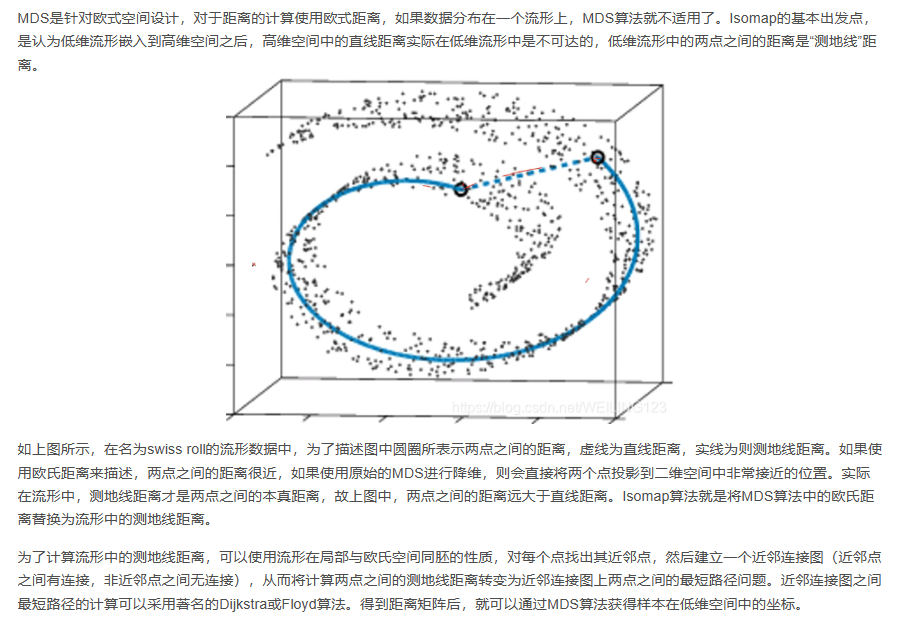

# 数据准备

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
from sklearn.manifold import Isomap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [14]:
#读取数据
data = pd.read_csv("../data/breast_cancer.csv")
print(data.head())

       0      1       2       3        4        5       6        7       8  \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

         9  ...     21      22      23      24      25      26      27  \
0  0.07871  ...  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       28       29  label  
0  0.4601  0.11890      0  
1  0.2750  0.08902      0  
2 

In [15]:
#准备数据
data = data.dropna()
y = data['label']
x = data.drop(['label'],axis=1).astype('float64')

# 训练集、测试集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 42)

# 模型训练

In [19]:
model = Isomap(n_components=3, n_neighbors=5)
model.fit(x_train)
model.embedding_.shape # 流形嵌入

(426, 3)

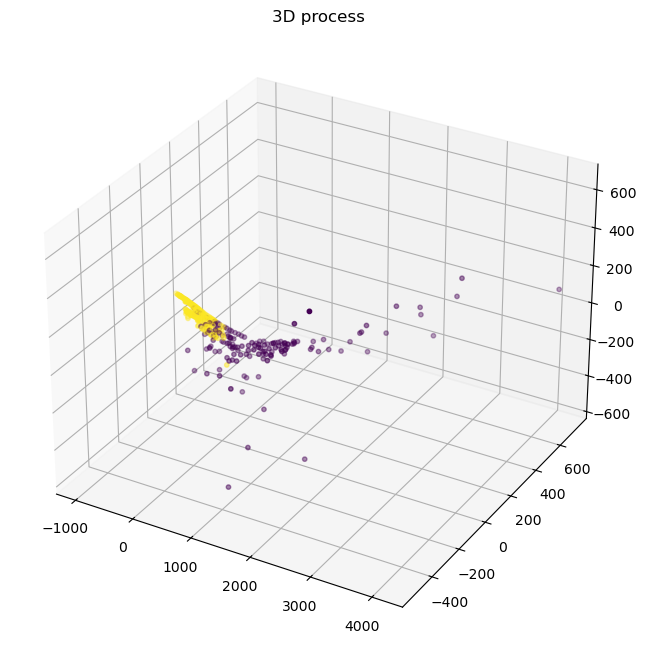

In [28]:
# 绘制三维效果图
x_new = model.transform(x_train)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.set_title('3D process')
ax.scatter(x_new[:,0], x_new[:,1], x_new[:,2] , c=y_train, s=10)

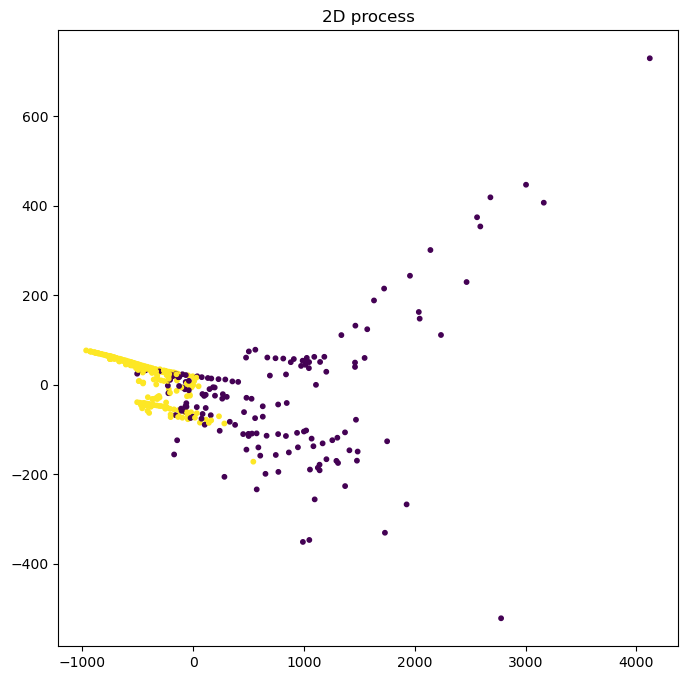

In [29]:
# 绘制二维效果图
x_new = model.transform(x_train)
plt.figure(figsize=(8, 8))
plt.title('2D process')
plt.scatter(x_new[:,0], x_new[:,1], c=y_train, s=10)

# 模型保存

In [5]:
# 法一
import joblib

# 保存模型
joblib.dump(model, '../test/best_models/isomap.pkl')

# 加载模型
model = joblib.load('../test/best_models/isomap.pkl')

In [6]:
# 法二
import pickle

with open('../test/best_models/isomap.pkl', 'wb') as f:
    pickle.dump(model, f)
 
#读取Model
with open('../test/best_models/isomap.pkl', 'rb') as f:
    model = pickle.load(f)

# 模型预测

In [7]:
# 转换数据
x_new = model.transform(x_train)

In [8]:
x_new.shape

(426, 10)

# 模型应用

In [9]:
# 先对数据降维，再进行分类
isomap = Isomap(n_components=10, n_neighbors=2)
isomap.fit(x_train)
x_new = isomap.transform(x_train)

# 分类模型
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [2, 3, 4]}

#GridSearchCV优化参数、训练模型
gsearch = GridSearchCV(knn, param_grid)
knn = gsearch.fit(x_new, y_train)

#打印最优结果
print('KNN params:', knn.best_estimator_)

KNN params: KNeighborsClassifier(n_neighbors=3)


In [10]:
x_new = isomap.transform(x_test)
prediction = knn.predict(x_new)

In [11]:
# 计算准确率
acc = accuracy_score(y_test, prediction)
print("acc为：", acc)

acc为： 0.916083916083916


In [12]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        54
           1       0.94      0.92      0.93        89

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143

